# Air Quality Classifier Predictive Model

# Step.1 Importing necessary Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 2. Loading Dataset

In [3]:
def load_dataset(filepath):
    df = pd.read_csv(filepath)
    return df

In [5]:
filepath = "Datasets/updated_pollution_dataset.csv"

In [7]:
# Calling the function

air_Q = load_dataset(filepath)
air_Q1 = air_Q.copy()

In [9]:
air_Q1.head(50)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


# Step 3. Inspecting the dataset

In [11]:
# Initializing Inpection function

def inspect_dataset(df):
    """
    inspecting and understanding various aspects od the dataset:
    dataset information, dataset dataset shape, datset stats summaries
    null values and duplicates
    """
    print("\n General dataset information")
    print(df.info())

    print("\n Dataset Statistical Summaries")
    print(df.describe())

    print("\n Missing Values per Column")
    print(df.isna().sum().tolist())

    print("\n Dataset Columns")
    print(df.columns.tolist())

In [13]:
inspect_dataset(air_Q1)


 General dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
None

 Dataset Statistical Summaries
       Temperature     Humidity        PM2

# Step 4. Dataset Preprocessing

In [15]:
# Identify duplicates
air_Q1.duplicated().sum().tolist()

0

In [15]:
"""
The dataset has zero duplicate values and null values
"""

'\nThe dataset has zero duplicate values and null values\n'

Feature Engineering

In [17]:
# Renaming Columns

air_Q1.rename(columns={"Proximity_to_Industrial_Areas": "Proximity_to_Ind_Areas",
                       "Population_Density": "Pop_Density",
                      
                      }, inplace=True)

In [19]:
air_Q1

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Ind_Areas,Pop_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [21]:
nums_cols = air_Q1.select_dtypes(include = ["number"]).columns
nums_cols

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Ind_Areas', 'Pop_Density'],
      dtype='object')

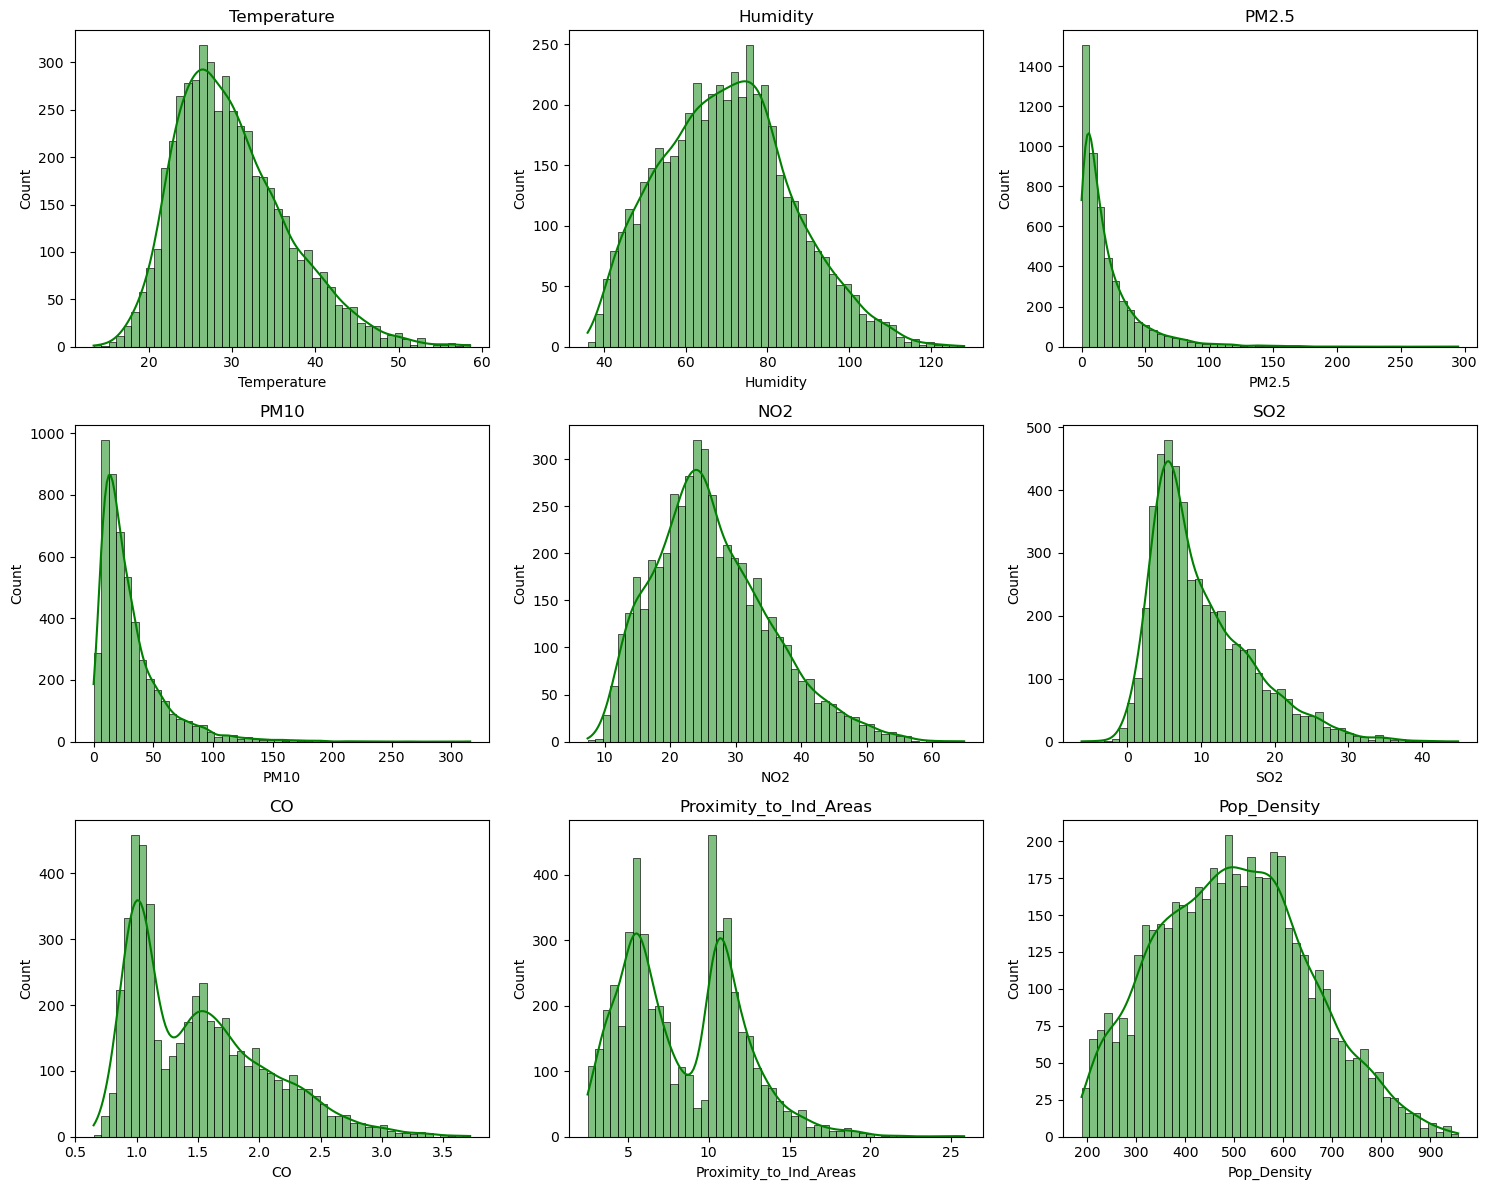

In [25]:
# Checking for distribution

# Set up the figure size and grid layout
num_features = len(nums_cols)
rows = (num_features // 3) + (num_features % 3 > 0)  # Create enough rows for 3 columns per row

plt.figure(figsize=(15, rows * 4))  # Adjust figure size dynamically

# Loop through each numerical column and plot
for i, col in enumerate(nums_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(air_Q1[col], bins=50, kde=True, color="green")
    plt.title(col)

plt.tight_layout()  # Adjust spacing to fit everything nicely
plt.show()

In [29]:
num_cols = air_Q1.select_dtypes(include = ["number"])

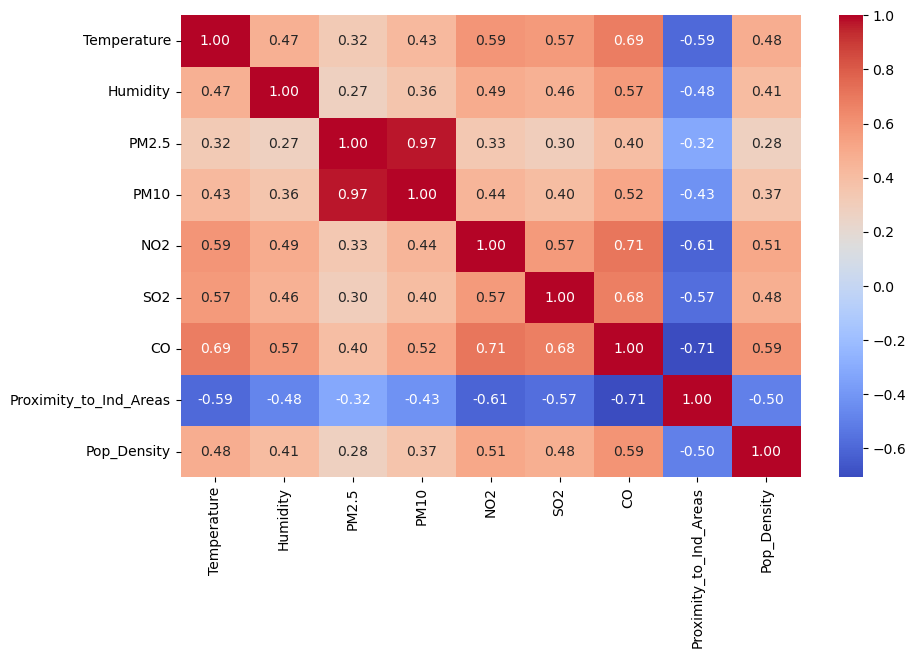

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [33]:
num_cols.median()

Temperature                29.00
Humidity                   69.80
PM2.5                      12.00
PM10                       21.70
NO2                        25.30
SO2                         8.00
CO                          1.41
Proximity_to_Ind_Areas      7.90
Pop_Density               494.00
dtype: float64

In [37]:
air_Q1[nums_cols] = np.log1p(air_Q1[nums_cols])  # log(1 + x) to avoid log(0) issue
print(air_Q1)

      Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0        3.427515  4.096010  1.824549  2.939162  2.990720  2.322388  1.000632   
1        3.377588  4.338597  1.193922  2.580217  3.459466  2.370244  0.970779   
2        3.182212  4.326778  3.321432  3.549617  3.234749  2.610070  0.966984   
3        3.335770  3.691376  1.960095  1.987874  2.674149  1.840550  0.765468   
4        3.314186  4.272491  2.066863  2.833213  3.131137  1.887070  0.698135   
...           ...       ...       ...       ...       ...       ...       ...   
4995     3.728100  4.318821  4.762174  4.849684  3.839452  3.284664  1.134623   
4996     3.370738  4.583947  2.066863  3.258097  3.269569  2.468100  0.932164   
4997     3.292126  4.371976  2.721295  3.139833  3.577948  2.174752  0.966984   
4998     3.269569  3.815512  3.109061  3.401197  3.206803  1.902108  0.636577   
4999     3.222868  4.368181  4.415220  4.557030  3.186353  2.442347  0.867100   

      Proximity_to_Ind_Area

C:\Users\HomePC\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [41]:
nums_cols2 = air_Q1.select_dtypes(include = ["number"]).columns
nums_cols

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Ind_Areas', 'Pop_Density'],
      dtype='object')

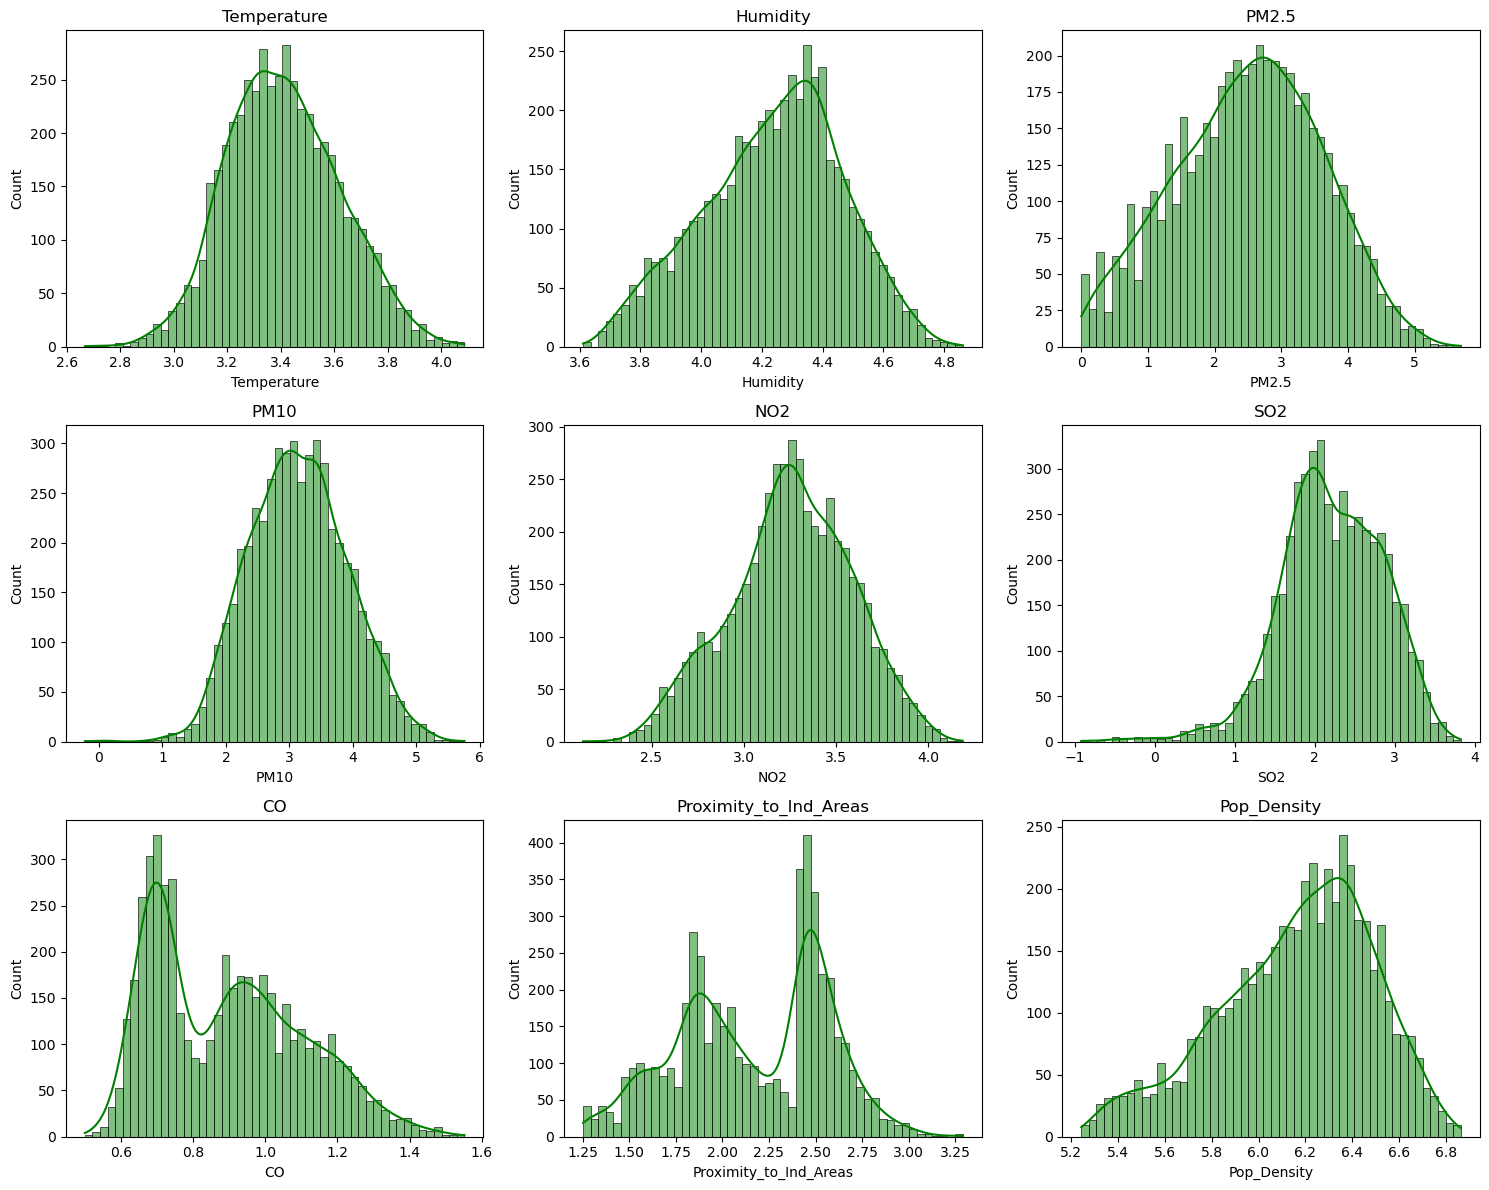

In [43]:
# Checking for distribution after log transformation

# Set up the figure size and grid layout
num_features = len(nums_cols2)
rows = (num_features // 3) + (num_features % 3 > 0)  # Create enough rows for 3 columns per row

plt.figure(figsize=(15, rows * 4))  # Adjust figure size dynamically

# Loop through each numerical column and plot
for i, col in enumerate(nums_cols2, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(air_Q1[col], bins=50, kde=True, color="green")
    plt.title(col)

plt.tight_layout()  # Adjust spacing to fit everything nicely
plt.show()

# Step. 5 Splitting the Dataset into X and y

In [45]:
air_Q1.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Ind_Areas', 'Pop_Density', 'Air Quality'],
      dtype='object')

In [92]:
X = air_Q1.drop(columns = ['Air Quality'])
y = air_Q1['Air Quality']

In [53]:
# Encoding the Target Variable

from sklearn.preprocessing import LabelEncoder

#initialize LabelEncoder

encoder = LabelEncoder()

# Encoding the Target Variablle

air_Q1['Air Quality'] = encoder.fit_transform(air_Q1['Air Quality'])

In [87]:
air_Q1 = air_Q1.dropna()

In [89]:
air_Q1

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Ind_Areas,Pop_Density,Air Quality
0,3.427515,4.096010,1.824549,2.939162,2.990720,2.322388,1.000632,1.987874,5.768321,2
1,3.377588,4.338597,1.193922,2.580217,3.459466,2.370244,0.970779,1.945910,6.416732,2
2,3.182212,4.326778,3.321432,3.549617,3.234749,2.610070,0.966984,1.824549,6.429719,2
3,3.335770,3.691376,1.960095,1.987874,2.674149,1.840550,0.765468,2.493205,6.313548,0
4,3.314186,4.272491,2.066863,2.833213,3.131137,1.887070,0.698135,2.617396,5.717028,0
...,...,...,...,...,...,...,...,...,...,...
4995,3.728100,4.318821,4.762174,4.849684,3.839452,3.284664,1.134623,1.335001,6.641182,1
4996,3.370738,4.583947,2.066863,3.258097,3.269569,2.468100,0.932164,1.902108,6.565265,2
4997,3.292126,4.371976,2.721295,3.139833,3.577948,2.174752,0.966984,2.360854,5.940171,2
4998,3.269569,3.815512,3.109061,3.401197,3.206803,1.902108,0.636577,2.533697,5.488938,0


In [94]:
# Splitting X and y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3,
    random_state = 42
)

# Step 6. Initializing and Training Models

In [61]:
rf_classifier = RandomForestClassifier(
    random_state = 42,
    n_estimators = 100,
    class_weight='balanced',
    n_jobs = -1
    
)
rf_classifier

RandomForestClassifier(n_jobs=-1, random_state=42)

In [63]:
# Initialize models with default parameters
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
    
)
gb_classifier

GradientBoostingClassifier(random_state=42)

In [65]:
xgb_classifier = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1,
    random_state=42,
    
)
xgb_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [96]:
# Training the models
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [98]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [100]:
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [102]:
# Prediction

rf_pred = rf_classifier.predict(X_test)

In [104]:
gb_pred = gb_classifier.predict(X_test)

In [106]:
xgb_pred = xgb_classifier.predict(X_test)

In [108]:
# Evaluation
def evaluate_classification(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(f"\n🔹 {model_name} Performance 🔹")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Predict using trained models
rf_pred_class = rf_classifier.predict(X_test)
gb_pred_class = gb_classifier.predict(X_test)
xgb_pred_class = xgb_classifier.predict(X_test)

# Evaluating each model
evaluate_classification(y_test, rf_pred, "RandomForestClassifier")
evaluate_classification(y_test, gb_pred, "GradientBoostingClassifier")
evaluate_classification(y_test, xgb_pred, "XGBClassifier")


🔹 RandomForestClassifier Performance 🔹
Accuracy: 0.9573
Precision: 0.9571
Recall: 0.9573
F1 Score: 0.9571

Confusion Matrix:
[[620   0   0   0]
 [  0 113   0  20]
 [  2   0 437  13]
 [  0  12  17 264]]

🔹 GradientBoostingClassifier Performance 🔹
Accuracy: 0.9526
Precision: 0.9523
Recall: 0.9526
F1 Score: 0.9523

Confusion Matrix:
[[620   0   0   0]
 [  0 110   0  23]
 [  2   0 437  13]
 [  0  11  22 260]]

🔹 XGBClassifier Performance 🔹
Accuracy: 0.9526
Precision: 0.9528
Recall: 0.9526
F1 Score: 0.9524

Confusion Matrix:
[[620   0   0   0]
 [  0 109   1  23]
 [  1   0 435  16]
 [  0   9  21 263]]


Debug the model

In [110]:
# Checking for Similarity in training and testing data

print(y_train.value_counts())
print(y_test.value_counts())

Air Quality
0    1378
2    1046
3     703
1     367
Name: count, dtype: int64
Air Quality
0    620
2    452
3    293
1    133
Name: count, dtype: int64


In [112]:
# Check for Data Leakage
# Ensure that X_train and X_test don’t contain overlapping data.

print(X_test.isin(X_train).sum())

Temperature               0
Humidity                  0
PM2.5                     0
PM10                      0
NO2                       0
SO2                       0
CO                        0
Proximity_to_Ind_Areas    0
Pop_Density               0
dtype: int64


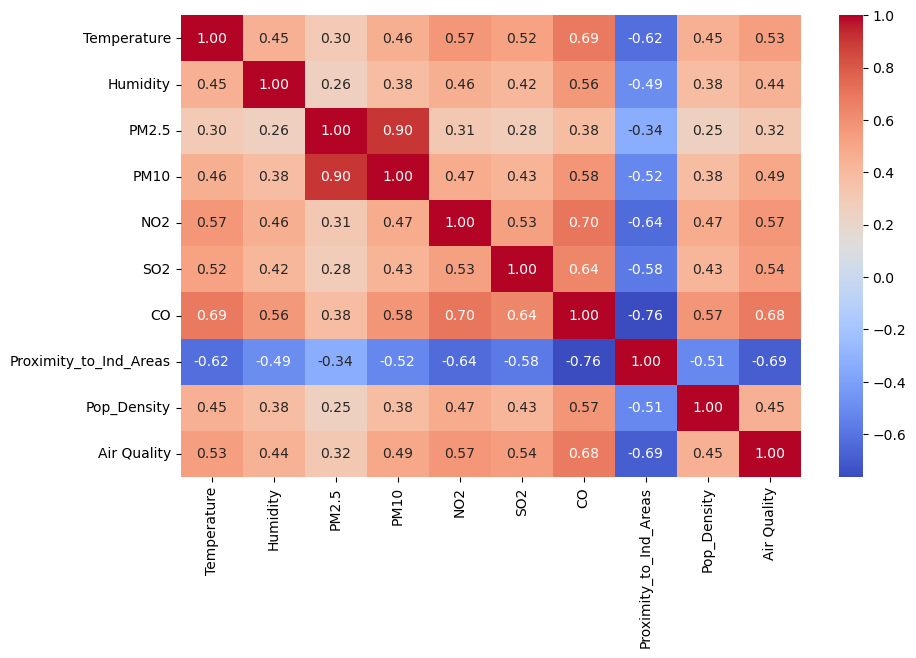

In [116]:
# Check for Target Leakage
# Ensure that none of your features directly correlate with the label (y).

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(air_Q1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# If one feature has a correlation close to 1 with y, it might be leaking information.

Handling Class Imbalance with SMOTE (Synthetic Minority Over-sampling Technique)

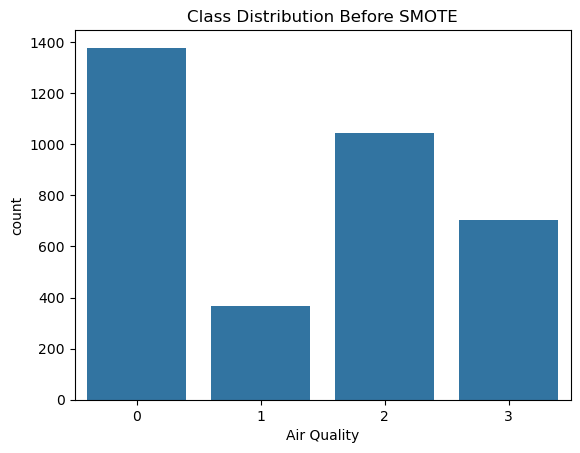

In [122]:
# Check Class Distribution

sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.show()

In [124]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 1378, 2: 1046, 3: 703, 1: 367})
After SMOTE: Counter({2: 1378, 0: 1378, 3: 1378, 1: 1378})


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [126]:
# Training models on resampled data

In [128]:
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [130]:
gb_classifier.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [132]:
xgb_classifier.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [134]:
# Predict using balanced models
rf_pred_resampled = rf_classifier.predict(X_test)
gb_pred_resampled = gb_classifier.predict(X_test)
xgb_pred_resampled = xgb_classifier.predict(X_test)


In [136]:
# Evaluate
from sklearn.metrics import classification_report

print("🔹 RandomForest Performance After SMOTE 🔹")
print(classification_report(y_test, rf_pred_resampled))

print("🔹 GradientBoosting Performance After SMOTE 🔹")
print(classification_report(y_test, gb_pred_resampled))

print("🔹 XGBClassifier Performance After SMOTE 🔹")
print(classification_report(y_test, xgb_pred_resampled))

🔹 RandomForest Performance After SMOTE 🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       620
           1       0.87      0.86      0.86       133
           2       0.97      0.95      0.96       452
           3       0.87      0.90      0.88       293

    accuracy                           0.95      1498
   macro avg       0.93      0.93      0.93      1498
weighted avg       0.95      0.95      0.95      1498

🔹 GradientBoosting Performance After SMOTE 🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       620
           1       0.86      0.87      0.87       133
           2       0.97      0.95      0.96       452
           3       0.88      0.89      0.89       293

    accuracy                           0.95      1498
   macro avg       0.93      0.93      0.93      1498
weighted avg       0.95      0.95      0.95      1498

🔹 XGBClassifier Performance After SMOTE 🔹
  

Model Optimization

In [147]:
# Reduce Overfitting

rf_classifier_opt = RandomForestClassifier(
    n_estimators=300, 
    max_depth=15, 
    min_samples_split=5, 
    class_weight='balanced',
    random_state=42
)

In [149]:
xgb_classifier_opt = XGBClassifier(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=6, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

In [151]:
gb_classifier_opt = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05, 
    max_depth=6, 
    subsample=0.8, 
    random_state=42)

In [155]:
rf_classifier_opt.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=5, n_estimators=300, random_state=42)

In [157]:
gb_classifier_opt.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, n_estimators=300,
                           random_state=42, subsample=0.8)

In [159]:
xgb_classifier_opt.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [163]:
# Predict using optimized models
rf_pred_resampled_opt = rf_classifier_opt.predict(X_test)
gb_pred_resampled_opt = gb_classifier_opt.predict(X_test)
xgb_pred_resampled_opt = xgb_classifier_opt.predict(X_test)


In [169]:
# Evaluate
from sklearn.metrics import classification_report

print("🔹 RandomForest Performance After optimization 🔹")
print(classification_report(y_test, rf_pred_resampled_opt))

print("🔹 GradientBoosting Performance After optimization 🔹")
print(classification_report(y_test, gb_pred_resampled_opt))

print("🔹 XGBClassifier Performance After optimization 🔹")
print(classification_report(y_test, xgb_pred_resampled_opt))

🔹 RandomForest Performance After optimization 🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       620
           1       0.87      0.88      0.87       133
           2       0.97      0.95      0.96       452
           3       0.87      0.89      0.88       293

    accuracy                           0.95      1498
   macro avg       0.93      0.93      0.93      1498
weighted avg       0.95      0.95      0.95      1498

🔹 GradientBoosting Performance After optimization 🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       620
           1       0.85      0.85      0.85       133
           2       0.97      0.96      0.96       452
           3       0.87      0.89      0.88       293

    accuracy                           0.95      1498
   macro avg       0.92      0.92      0.92      1498
weighted avg       0.95      0.95      0.95      1498

🔹 XGBClassifier Performance Af

In [174]:
# Cross-validation for XGBoost

from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_classifier_opt, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy:", scores.mean())
print("XGBoost is the best performing model")

Cross-Validation Accuracy: 0.9715183635457167
XGBoost is the best performing model


# Steps to Deploy Your XGBoost Model

In [177]:
# SAving the Model

import joblib

In [192]:
# Save the trained XGBoost model
joblib.dump(xgb_classifier, "Air_Quality_model.pkl")

# To load the model later
# loaded_model = joblib.load("xgb_model.pkl")

['Air_Quality_model.pkl']

In [184]:
pip install fastapi

   ---------------------------------------- 0.0/94.9 kB ? eta -:--:--
   ------------ --------------------------- 30.7/94.9 kB 640.0 kB/s eta 0:00:01
   ----------------- ---------------------- 41.0/94.9 kB 487.6 kB/s eta 0:00:01
   ------------------------- -------------- 61.4/94.9 kB 465.5 kB/s eta 0:00:01
   ------------------------- -------------- 61.4/94.9 kB 465.5 kB/s eta 0:00:01
   ------------------------- -------------- 61.4/94.9 kB 465.5 kB/s eta 0:00:01
   -------------------------------------- - 92.2/94.9 kB 308.0 kB/s eta 0:00:01
   -------------------------------------- - 92.2/94.9 kB 308.0 kB/s eta 0:00:01
   -------------------------------------- - 92.2/94.9 kB 308.0 kB/s eta 0:00:01
   -------------------------------------- - 92.2/94.9 kB 308.0 kB/s eta 0:00:01
   -------------------------------------- - 92.2/94.9 kB 308.0 kB/s eta 0:00:01
   ---------------------------------------- 94.9/94.9 kB 169.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/72

In [188]:
pip install python-multipart

Note: you may need to restart the kernel to use updated packages.


In [194]:
# Building API

from fastapi import FastAPI
import joblib
import numpy as np

app = FastAPI()

# Load the trained model
model = joblib.load("Air_Quality_model.pkl")

@app.post("/predict/")
def predict(data: list):
    prediction = model.predict(np.array(data).reshape(1, -1))
    return {"prediction": int(prediction[0])}